# Baseline Classifier:
* Classificador simples para termos um parâmetro de comparação com modelos complexos;
* Poucas features para serem analisadas;

## Feature Engineering:
* Quais features tem mais correlação com default payment?

In [1]:
import pandas as pd
import phik
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

In [2]:
df = pd.read_csv('data/credit_card_default.csv')
df['MARRIAGE'] = df['MARRIAGE'].astype('category')
df['SEX'] = df['SEX'].astype('category')
df['EDUCATION'] = df['EDUCATION'].astype('category')
# df['PAY_0'] = df['PAY_0'].astype('category')
# df['PAY_2'] = df['PAY_2'].astype('category')
# df['PAY_3'] = df['PAY_3'].astype('category')
# df['PAY_4'] = df['PAY_4'].astype('category')
# df['PAY_5'] = df['PAY_5'].astype('category')
# df['PAY_6'] = df['PAY_6'].astype('category')

In [3]:
df

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment_next_month
0,1,20000,2,2,1,24,2,2,-1,-1,...,0,0,0,0,689,0,0,0,0,1
1,2,120000,2,2,2,26,-1,2,0,0,...,3272,3455,3261,0,1000,1000,1000,0,2000,1
2,3,90000,2,2,2,34,0,0,0,0,...,14331,14948,15549,1518,1500,1000,1000,1000,5000,0
3,4,50000,2,2,1,37,0,0,0,0,...,28314,28959,29547,2000,2019,1200,1100,1069,1000,0
4,5,50000,1,2,1,57,-1,0,-1,0,...,20940,19146,19131,2000,36681,10000,9000,689,679,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000,1,3,1,39,0,0,0,0,...,88004,31237,15980,8500,20000,5003,3047,5000,1000,0
29996,29997,150000,1,3,2,43,-1,-1,-1,-1,...,8979,5190,0,1837,3526,8998,129,0,0,0
29997,29998,30000,1,2,2,37,4,3,2,-1,...,20878,20582,19357,0,0,22000,4200,2000,3100,1
29998,29999,80000,1,3,1,41,1,-1,0,0,...,52774,11855,48944,85900,3409,1178,1926,52964,1804,1


In [14]:
corr = df.phik_matrix()
corr.style.background_gradient(cmap='coolwarm', axis=None)

interval columns not set, guessing: ['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'label']


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,label
ID,1.000000,0.055975,0.233960,0.067983,0.034424,0.054260,0.110677,0.099655,0.100722,0.094103,0.058473,0.081925,0.039958,0.031608,0.040426,0.077657,0.032270,0.012913,0.000000,0.012721,0.000000,0.000000,0.000000,0.000000,0.049238
LIMIT_BAL,0.055975,1.000000,0.067889,0.209031,0.097000,0.239314,0.236018,0.253225,0.244485,0.229979,0.296947,0.283299,0.689167,0.815135,0.303787,0.674139,0.812216,0.673708,0.087070,0.097931,0.500500,0.212763,0.166230,0.123632,0.152429
SEX,0.233960,0.067889,1.000000,0.026868,0.047782,0.118888,0.086080,0.097834,0.092799,0.083723,0.055822,0.046465,0.034783,0.032844,0.017161,0.033096,0.020939,0.034744,0.000000,0.000000,0.011572,0.000000,0.018508,0.016307,0.061943
EDUCATION,0.067983,0.209031,0.026868,1.000000,0.165164,0.219180,0.160205,0.172596,0.166987,0.153705,0.135712,0.131112,0.061379,0.080682,0.120415,0.048832,0.078107,0.035039,0.000000,0.000000,0.034443,0.000000,0.026476,0.046846,0.067648
MARRIAGE,0.034424,0.097000,0.047782,0.165164,1.000000,0.452018,0.059940,0.056332,0.053110,0.059119,0.052163,0.047367,0.027773,0.019209,0.017451,0.023541,0.023490,0.036477,0.045868,0.028826,0.028106,0.046642,0.000000,0.000000,0.049847
AGE,0.054260,0.239314,0.118888,0.219180,0.452018,1.000000,0.134407,0.143368,0.136366,0.129845,0.093346,0.086600,0.140800,0.092186,0.083674,0.137557,0.104675,0.122627,0.000000,0.000000,0.031107,0.000000,0.025393,0.000000,0.063117
PAY_0,0.110677,0.236018,0.086080,0.160205,0.059940,0.134407,1.000000,0.941713,0.880495,0.855286,0.660264,0.608582,0.400427,0.363660,0.387161,0.388743,0.347431,0.248092,0.000000,0.001914,0.017440,0.011035,0.085883,0.087834,0.547789
PAY_2,0.099655,0.253225,0.097834,0.172596,0.056332,0.143368,0.941713,1.000000,0.932231,0.869954,0.678993,0.625823,0.408972,0.377678,0.405438,0.400082,0.366501,0.254055,0.046557,0.050988,0.022500,0.000000,0.043755,0.059513,0.442238
PAY_3,0.100722,0.244485,0.092799,0.166987,0.053110,0.136366,0.880495,0.932231,1.000000,0.945887,0.776537,0.718233,0.403368,0.392294,0.428357,0.418645,0.379258,0.260264,0.000000,0.045996,0.027273,0.002812,0.031192,0.130197,0.384316
PAY_4,0.094103,0.229979,0.083723,0.153705,0.059119,0.129845,0.855286,0.869954,0.945887,1.000000,0.890440,0.818396,0.383057,0.369539,0.437313,0.431000,0.393223,0.262163,0.000000,0.000000,0.071992,0.021530,0.021128,0.172707,0.363011


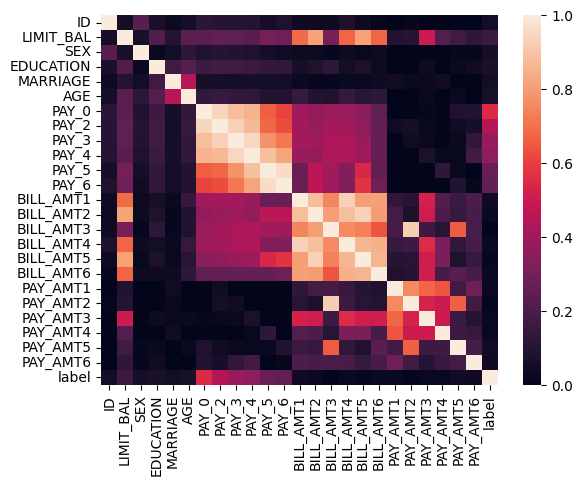

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.heatmap(corr)
plt.savefig('corr.png', dpi=400)

In [4]:
#Splitting simples dados
y = df['default payment_next_month'].values
x = df.drop(['default payment_next_month', 'ID'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=42)

In [5]:
clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

In [6]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3497
           1       0.69      0.36      0.47      1003

    accuracy                           0.82      4500
   macro avg       0.76      0.66      0.68      4500
weighted avg       0.81      0.82      0.80      4500



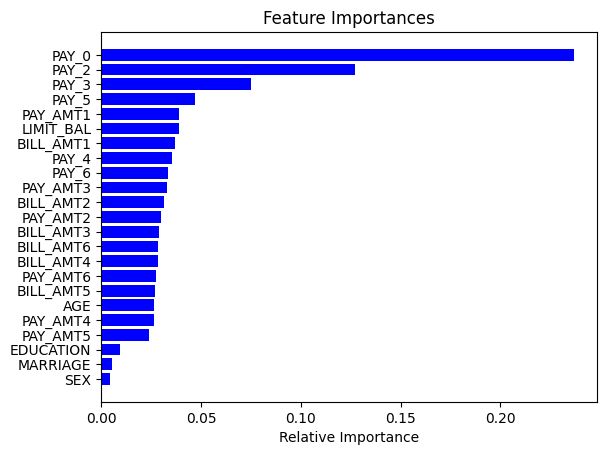

In [9]:
import numpy as np
import matplotlib.pyplot as plt

features = x_train.columns.values
importances = clf.feature_importances_
indices = np.argsort(importances)

#plt.figure(figsize=(10, 10), dpi=300)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('fe.png', dpi=300)
plt.show()

In [7]:
#Lets add some feature engineering
# df['diff_paid1'] = df.apply(lambda x: x['BILL_AMT1'] - x['PAY_AMT1'], axis=1)
# df['diff_paid2'] = df.apply(lambda x: x['BILL_AMT2'] - x['PAY_AMT2'], axis=1)
# df['diff_paid3'] = df.apply(lambda x: x['BILL_AMT3'] - x['PAY_AMT3'], axis=1)
# df['diff_paid4'] = df.apply(lambda x: x['BILL_AMT4'] - x['PAY_AMT4'], axis=1)
# df['diff_paid5'] = df.apply(lambda x: x['BILL_AMT5'] - x['PAY_AMT5'], axis=1)
# df['diff_paid6'] = df.apply(lambda x: x['BILL_AMT6'] - x['PAY_AMT6'], axis=1)

#Feature engineering
#PAY_x está bem relacionado com o bill_amt que está bem relacionado com LIMIT_BAL
df['sum_bill_amount'] = df.apply(lambda x: x['BILL_AMT1']+x['BILL_AMT2']+x['BILL_AMT3']+x['BILL_AMT4']+x['BILL_AMT5']+x['BILL_AMT6'], axis=1)
df['sum_payment_delay'] = df.apply(lambda x: x['PAY_0']+x['PAY_2']+x['PAY_3']+x['PAY_4']+x['PAY_5']+x['PAY_6'], axis=1)
df['sum_payment_amount'] = df.apply(lambda x: x['PAY_AMT1']+x['PAY_AMT2']+x['PAY_AMT3']+x['PAY_AMT4']+x['PAY_AMT5']+x['PAY_AMT6'], axis=1)

df['%_sum_bill_in_limit'] = df.apply(lambda x: (x['sum_bill_amount']/x['LIMIT_BAL'])*100, axis=1)

In [18]:
corr = df.phik_matrix()
corr.style.background_gradient(cmap='coolwarm', axis=None)

interval columns not set, guessing: ['ID', 'LIMIT_BAL', 'AGE', 'PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6', 'default payment_next_month', 'sum_bill_amount', 'sum_payment_delay', 'sum_payment_amount', '%_sum_bill_in_limit']


,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,PAY_5,PAY_6,BILL_AMT1,BILL_AMT2,BILL_AMT3,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default payment_next_month,sum_bill_amount,sum_payment_delay,sum_payment_amount,%_sum_bill_in_limit
ID,1.000000,0.055975,0.233960,0.067983,0.034424,0.054260,0.110677,0.099655,0.100722,0.094103,0.058473,0.081925,0.039958,0.031608,0.040426,0.077657,0.032270,0.012913,0.000000,0.012721,0.000000,0.000000,0.000000,0.000000,0.049238,0.043884,0.103000,0.014823,0.044806
LIMIT_BAL,0.055975,1.000000,0.067889,0.209031,0.097000,0.239314,0.236018,0.253225,0.244485,0.229979,0.296947,0.283299,0.689167,0.815135,0.303787,0.674139,0.812216,0.673708,0.087070,0.097931,0.500500,0.212763,0.166230,0.123632,0.152429,0.677839,0.258680,0.440829,0.286292
SEX,0.233960,0.067889,1.000000,0.026868,0.047782,0.118888,0.086080,0.097834,0.092799,0.083723,0.055822,0.046465,0.034783,0.032844,0.017161,0.033096,0.020939,0.034744,0.000000,0.000000,0.011572,0.000000,0.018508,0.016307,0.061943,0.028997,0.087915,0.000000,0.103607
EDUCATION,0.067983,0.209031,0.026868,1.000000,0.165164,0.219180,0.160205,0.172596,0.166987,0.153705,0.135712,0.131112,0.061379,0.080682,0.120415,0.048832,0.078107,0.035039,0.000000,0.000000,0.034443,0.000000,0.026476,0.046846,0.067648,0.061805,0.163864,0.000000,0.164102
MARRIAGE,0.034424,0.097000,0.047782,0.165164,1.000000,0.452018,0.059940,0.056332,0.053110,0.059119,0.052163,0.047367,0.027773,0.019209,0.017451,0.023541,0.023490,0.036477,0.045868,0.028826,0.028106,0.046642,0.000000,0.000000,0.049847,0.036622,0.064993,0.045814,0.065603
AGE,0.054260,0.239314,0.118888,0.219180,0.452018,1.000000,0.134407,0.143368,0.136366,0.129845,0.093346,0.086600,0.140800,0.092186,0.083674,0.137557,0.104675,0.122627,0.000000,0.000000,0.031107,0.000000,0.025393,0.000000,0.063117,0.106774,0.142039,0.017447,0.109719
PAY_0,0.110677,0.236018,0.086080,0.160205,0.059940,0.134407,1.000000,0.941713,0.880495,0.855286,0.660264,0.608582,0.400427,0.363660,0.387161,0.388743,0.347431,0.248092,0.000000,0.001914,0.017440,0.011035,0.085883,0.087834,0.547789,0.333874,0.898308,0.016791,0.421715
PAY_2,0.099655,0.253225,0.097834,0.172596,0.056332,0.143368,0.941713,1.000000,0.932231,0.869954,0.678993,0.625823,0.408972,0.377678,0.405438,0.400082,0.366501,0.254055,0.046557,0.050988,0.022500,0.000000,0.043755,0.059513,0.442238,0.346108,0.906445,0.031804,0.450548
PAY_3,0.100722,0.244485,0.092799,0.166987,0.053110,0.136366,0.880495,0.932231,1.000000,0.945887,0.776537,0.718233,0.403368,0.392294,0.428357,0.418645,0.379258,0.260264,0.000000,0.045996,0.027273,0.002812,0.031192,0.130197,0.384316,0.357038,0.940700,0.024116,0.457606
PAY_4,0.094103,0.229979,0.083723,0.153705,0.059119,0.129845,0.855286,0.869954,0.945887,1.000000,0.890440,0.818396,0.383057,0.369539,0.437313,0.431000,0.393223,0.262163,0.000000,0.000000,0.071992,0.021530,0.021128,0.172707,0.363011,0.355163,0.941410,0.000000,0.454865


In [12]:
#Splitting
y = df['default payment_next_month'].values
#Removing ids columns and columns with low phik correlation
x = df.drop(['default payment_next_month', 'ID', 'MARRIAGE', 'SEX', 'EDUCATION', 'sum_payment_amount', 'sum_bill_amount', 'BILL_AMT1', 'BILL_AMT2',	'BILL_AMT3','BILL_AMT4', 'BILL_AMT5','BILL_AMT6'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=42)

clf = RandomForestClassifier(max_depth=10, random_state=0)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.95      0.89      3497
           1       0.69      0.37      0.48      1003

    accuracy                           0.82      4500
   macro avg       0.77      0.66      0.69      4500
weighted avg       0.81      0.82      0.80      4500



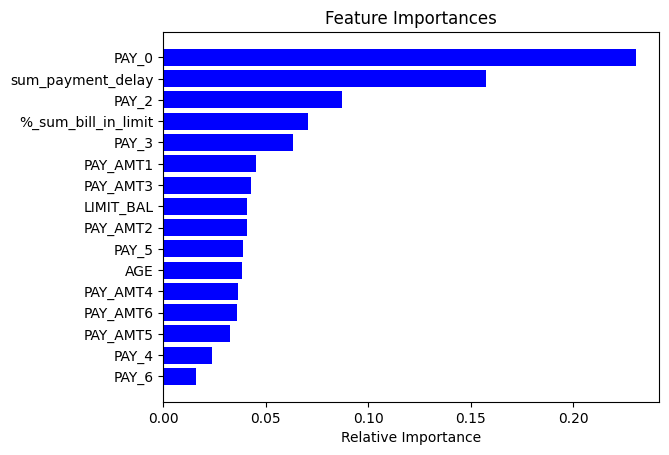

In [13]:
features = x_train.columns.values
importances = clf.feature_importances_
indices = np.argsort(importances)

# plt.figure(figsize=(18, 16), dpi=300)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.savefig('fe.png', dpi=300)

plt.show()

Podemos notar que as features criadas impactaram positivamente no modelo

## XGBoost:

As next model we will use xgboost + sklearn pipelines and grid search

In [8]:
from sklearn.compose import ColumnTransformer
from sklearn.datasets import fetch_openml
from sklearn.pipeline import Pipeline, FeatureUnion
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer


cat_features = ["SEX", "EDUCATION", "MARRIAGE"]
cat_transformer = Pipeline(
    steps=[("imputer", OneHotEncoder(handle_unknown = 'ignore'))]
)

numeric_features = x_train.columns.values
num_transformer = Pipeline(
    steps=[("imputer", SimpleImputer(strategy="median")), ("scaler", StandardScaler())]
)

preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_transformer, numeric_features),
    ],remainder="passthrough"
)

In [9]:
import xgboost as xgb


mdl = xgb.XGBClassifier(learning_rate=0.3, max_depth=8)

xgb_pipe = Pipeline([
('preprocessor', preprocessor),
('classifier', mdl)
])

In [10]:
from sklearn.model_selection import GridSearchCV

from sklearn.preprocessing import LabelEncoder

param_grid_xgb = {
    'classifier__n_estimators': [500,1000],
    'classifier__max_depth':[12,20]
}
xgb_grid = GridSearchCV(xgb_pipe, param_grid_xgb, cv=2, n_jobs=-1, scoring='f1_macro')
print("Treinando XGBoost...")
xgb_grid.fit(x_train, y_train)

Treinando XGBoost...


KeyboardInterrupt: 

In [36]:
y_pred = xgb_grid.predict(x_test)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.92      0.88      3497
           1       0.59      0.39      0.47      1003

    accuracy                           0.80      4500
   macro avg       0.72      0.66      0.68      4500
weighted avg       0.79      0.80      0.79      4500



XGBoost did worse than a simple RF Classifier

## Balancing Dataset

* Using SMOTE to upsample the minority class;
* Using Stratified KFold to ensure percentage preservation of each class during CV

In [11]:
from imblearn.pipeline import Pipeline 
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import StratifiedKFold

In [12]:
stratified_kfold = StratifiedKFold(n_splits=3,
                                       shuffle=True,
                                       random_state=11)

In [16]:
y = df['default payment_next_month'].values
#Removing ids columns and columns with low phik correlation
x = df.drop(['default payment_next_month', 'ID'], axis=1)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.15, random_state=42)

mdl = xgb.XGBClassifier(learning_rate=0.2, max_depth=8)

xgb_pipe = Pipeline([
('smote', SMOTE(random_state=42)),
('preprocessor', preprocessor),
('classifier', mdl)
])

In [17]:
param_grid_xgb = {
    'classifier__n_estimators': [300,500],
    'classifier__max_depth':[50,100],
    'classifier__scale_pos_weight':[10,50,99]
}
grid_search = GridSearchCV(estimator=xgb_pipe,
                           param_grid=param_grid_xgb,
                           scoring='f1_macro',
                           cv=stratified_kfold,
                           n_jobs=-1)


In [18]:
grid_search.fit(x_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=3, random_state=11, shuffle=True),
             estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('preprocessor',
                                        ColumnTransformer(remainder='passthrough',
                                                          transformers=[('num',
                                                                         Pipeline(steps=[('imputer',
                                                                                          SimpleImputer(strategy='median')),
                                                                                         ('scaler',
                                                                                          StandardScaler())]),
                                                                         array(['LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE',...
                                                      max_delta_step=None,
                                                      max_depth=8,
                                                      max_leaves=None,
                                                      min_child_weight=None,
                                                      missing=nan,
                                                      monotone_constraints=None,
                                                      n_estimators=100,
                                                      n_jobs=None,
                                                      num_parallel_tree=None,
                                                      predictor=None,
                                                      random_state=None, ...))]),
             n_jobs=-1,
             param_grid={'classifier__max_depth': [50, 100],
                         'classifier__n_estimators': [300, 500],
                         'classifier__scale_pos_weight': [10, 50, 99]},
             scoring='f1_macro')

In [19]:
y_pred = grid_search.predict(x_test)

print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.85      0.89      0.87      3497
           1       0.54      0.46      0.49      1003

    accuracy                           0.79      4500
   macro avg       0.69      0.67      0.68      4500
weighted avg       0.78      0.79      0.78      4500



In [20]:
grid_search.best_estimator_.named_steps["classifier"]

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=0.2, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=50, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=500, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [78]:
feat_imp = grid_search.best_estimator_.named_steps["classifier"].feature_importances_


In [25]:
features = x_train.columns.values
importances = feat_imp
indices = np.argsort(importances)

plt.figure(figsize=(18, 16), dpi=300)

plt.title('Feature Importances')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

NameError: name 'feat_imp' is not defined

In [28]:
import shap

# Fits the explainer
explainer = shap.Explainer(grid_search.predict, x_test)
# Calculates the SHAP values - It takes some time
shap_values = explainer(x_test)

Permutation explainer: 4501it [38:36,  1.94it/s]                                                                                                                                                


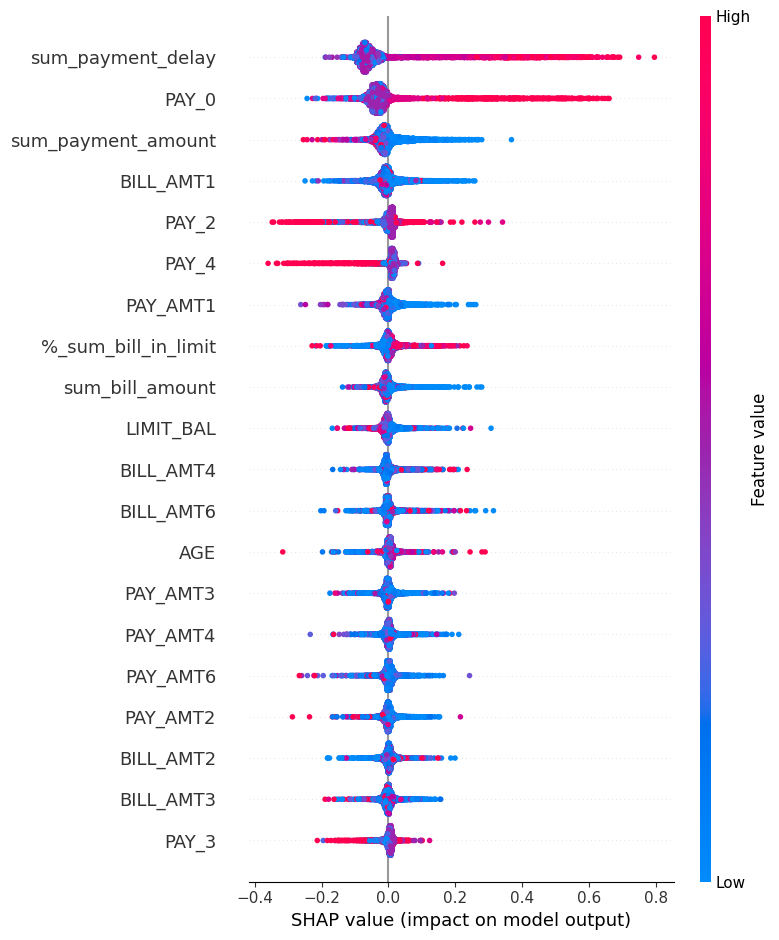

In [34]:
import matplotlib.pyplot as plt
%matplotlib inline
shap.summary_plot(shap_values, show=False)
plt.savefig('scratch.png')